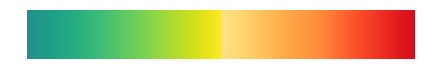

In [152]:
import os 
import numpy as np 
import pandas as pd 
import seaborn as sns

from matplotlib import colors
import seaborn as sns 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from matplotlib import colors

datadir = '/Users/kanaaax/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/dataframes/AHBA/ahba_data/'
save_fig_dir = '/Users/kanaaax/Google Drive/TS-EUROTRAIN/Papers/2016_QSM_paper/Figures_python_v4'


cmap_drysdale = colors.ListedColormap(['#00ffff', '#00afff','#0000ff', '#260000', '#530000','#fe0000', '#ff6a00', '#ffff00'])

cmap_ted = colors.ListedColormap(['#00ffff', '#00afff','#0000ff', '#260000', '#530000','#fe0000', '#ff6a00','#ffff00', '#ffffff'])

cmap_rdbu = colors.ListedColormap(['#d73027', '#fc8d59', '#fee090', '#e0f3f8', '#91bfdb', '#4575b4'][::-1])
cmap_rdbu2 = colors.ListedColormap(['#cb1a1e', '#e1817f', '#f1bebe', '#e0f3f8', '#91bfdb', '#4575b4'][::-1])

first = int((128*2)-np.round(255*(1.-0.50)))
second = (256-first)
colors2 = plt.cm.viridis(np.linspace(0.5, 1, first))
colors3 = plt.cm.YlOrRd(np.linspace(0.2, 0.8, second))
colors4 = plt.cm.PuBu(np.linspace(0., 0.25, second))

cols = np.vstack((colors2,colors3))
cmap_gradient = colors.LinearSegmentedColormap.from_list('my_colormap', cols)

num = 256
gradient = range(num)
for x in range(5):
    gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(nrows=1)
ax.imshow(gradient, cmap=cmap_gradient, interpolation='nearest')
ax.set_axis_off()
fig.tight_layout()

plt.show()




In [2]:
#read gene expression data 
ahba    = pd.read_csv(os.path.join(datadir,'AHBA_20737.csv'), index_col=0)


/Users/kanaaax/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (20763,20764,20765) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# define gene list
# Read PPI gene list
glist = ['HTR4', 'HTR6', 'HTR2B', 'HTR2C', 'HTR1B', 'HTR1D', 'GRN4', 'DRD2', 'GABRA3']
glist = ['GRHPR', 'PTPRN2', 'CCM2L', 'GRM6', 'PLPPR4', 'IRP1']
glist = [ 'GABRA4', 'FIGNL2', 'DLG5', 'SYN1', 'PLPPR3', 'DNTTIP2', 'STX19', 'GRHPR', 'PTPRN2', 'CCM2L', 'GRM6', 'PLPPR4']
glist = ['FTH1P14','FTH1P20','FTHL16','FTHL17','FTL','FTLP17','FTMT']
glist = ['GRM7']

glistall = ['GABRA1', 'GABRA2','GABRA3', 'GABRA4','NPTN','GABRA6', 'GABRG2', 'GABRB2',
            'HTR4', 'HTR6', 'HTR2B', 'HTR2C', 'HTR1B', 'HTR1D', 'GRN4', 'DRD2', 'GABRA3',
            'GRHPR', 'PTPRN2', 'CCM2L', 'GRM6', 'PLPPR4', 'IRP1', 
            'GABRA4', 'FIGNL2', 'DLG5', 'SYN1', 'PLPPR3', 'DNTTIP2', 'STX19', 'GRHPR', 'PTPRN2', 'CCM2L', 'GRM6', 'PLPPR4', 
            'FTH1P14','FTH1P20','FTHL16','FTHL17','FTL','FTLP17','FTMT'
        ]

ferritin = ['FTH1P14','FTH1P20','FTHL16','FTHL17','FTL','FTLP17','FTMT']
gaba     = ['GABRA1', 'GABRA2', 'GABRA6','NPTN','GABRG2', 'GABRB2', 'GABRA6', 'GABRA3'] 

GABRA = ['GABRA4', 'GABRA6', 'GABRA1', 'GABRG2', 'GABRB2', 'GABRP', 
         'GABRA2', 'GABRA3', 'GABRE', 'GABRD', 'GABRR1', 'GABRQ', 
         'GABRB1', 'GABRR3', 'GABRR2', 'GABRB3', 'GABRA5']


In [4]:
# Read Chi tstat 
ahba_dir     = '/Users/kanaaax/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/dataframes/AHBA/'
MNI = pd.read_csv(os.path.join(ahba_dir,'QSM_TSTATS/MNI_NIFTI_VALUES_permute_10K_OCT2.csv'), index_col = 0 )


In [5]:
# drop wells outside the striatal motor masks 
drop_wells = [2209, # donor1 claustrum	claustrum, right
              2233, # donor1 claustrum	claustrum, left
              2257, # donor1 claustrum	claustrum, right
              2265, # donor1 claustrum	claustrum, left
              2249, # donor1 claustrum	claustrum, left
              2371, # donor1 claustrum	claustrum, right
              2379, # donor1 claustrum	claustrum, left
              2977, # donor1	claustrum	claustrum, left
              5667, # donor2 claustrum	claustrum, right
              5705, # donor2	claustrum	claustrum, left
              5675, # donor2 claustrum	claustrum, left
              5769, # donor2	claustrum	claustrum, left
              5898, # donor2 dorsal thalamus	anterior group of nuclei
              11270, # donor3	corpus callosum	NaN 
              127687121, # donor5	corpus callosum	NaN
              147628210, # donor5	claustrum	claustrum, left
              147628277, # donor5 claustrum	claustrum, left
              156906844, # donor5	claustrum	claustrum, left
              160091500, # donor6 basal forebrain	septal nuclei
              126432198, #
              160091566, #   donor6 perifornical nucleus, left	tuberal region
              160091502, #   donor6 ventromedial hypothalamic nucleus, left	tuberal region
              159226045, # donor6 striatum//caudate nucleus//body of the caudate nucleus//body of caudate nucleus, left'
             ]

chi_str3m  = pd.DataFrame(MNI['STR3_MOTOR_tstat_CP_1mm'].dropna())
chi_str3m = chi_str3m.drop([i for i in chi_str3m.index if i in drop_wells])


In [157]:
def plt_glist(xlist, label): 
    #keep pls genes 
    pls_genes = ahba.drop([i for i in ahba.columns if i not in xlist],axis =1)

    # keep str motor wells
    pls_genes = pls_genes.drop([i for i in ahba.index if i not in chi_str3m.index],axis =0)

    #scale pls gene expression
    scaler = preprocessing.MinMaxScaler()
    df_scaled_pls = pd.DataFrame(scaler.fit_transform(pls_genes), columns=pls_genes.columns, index=pls_genes.index)

    # scale qsm
    df_scaled_chi = pd.DataFrame(scaler.fit_transform(chi_str3m), columns=chi_str3m.columns, index=chi_str3m.index)


    sns.distplot(df_scaled_pls.mean())
    sns.distplot(df_scaled_chi)

    df_PLOT = pd.concat([df_scaled_pls, df_scaled_chi], axis=1).T
    df_PLOTx = df_PLOT.T.sort_values('STR3_MOTOR_tstat_CP_1mm').iloc[:].T
    #df_PLOTx = df_PLOT.T.sort_values('GABRG2').T 

    vmin = -.4
    vmax = 0.8

    cmap = 'viridis'
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(df_PLOTx, cmap=cmap,vmin=vmin,vmax=vmax, linewidths=1, square=False)
    sns.clustermap(df_PLOTx,cmap=cmap,vmin=vmin,vmax=vmax, row_cluster=True,col_cluster=True,linewidths=0.2)

    plt.savefig(os.path.join(save_fig_dir,'latent_structure_%s.png'%label), bbox_inches='tight', transparent = 1, dpi = 500)


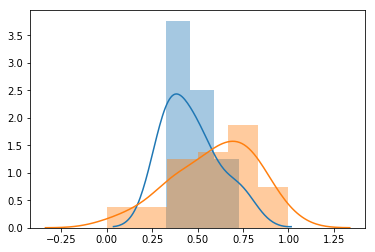

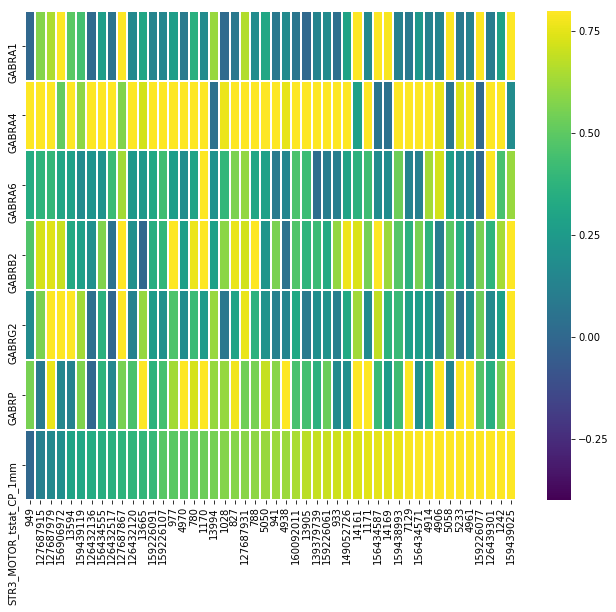

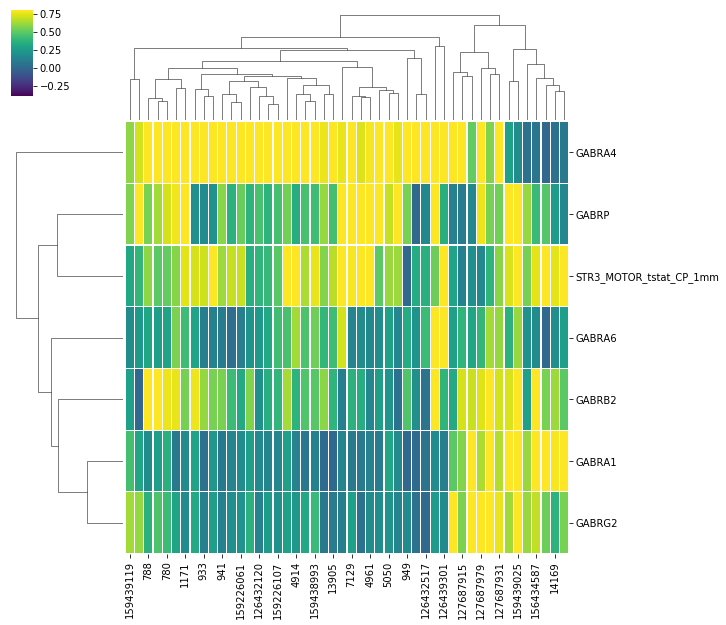

In [160]:
xlist = ['GABRA4', 'GABRA6', 'GABRA1', 'GABRG2', 'GABRB2', 'GABRP',# 'GABRA2', 'GABRA3', 'GABRE',
         #'GABRD', 'GABRR1', 'GABRQ', 'GABRB1', 'GABRR3', 'GABRR2', 'GABRA5', 'GABRB3', 'GABBR2'
        ]              
#xlist = ['GABRA4', 'GABRA2', 'GABRB3', 'GABRG2', 'GABRA6', 'NPTN', 'GABRA3', 'GABRA1']

plt_glist(xlist, 'gaba')
plt.savefig(os.path.join(save_fig_dir,'latent_structure_GABA.png'), bbox_inches='tight', transparent = 1, dpi = 500)


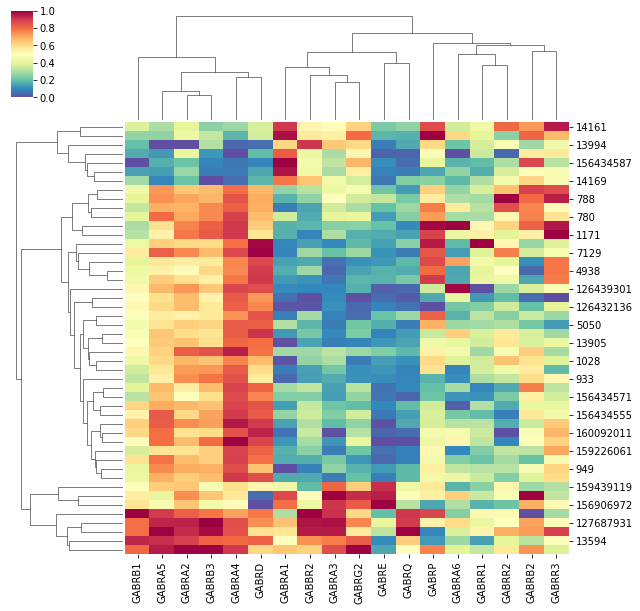

In [54]:
#keep pls genes 
pls_genes = ahba.drop([i for i in ahba.columns if i not in xlist],axis =1)

# keep str motor wells
pls_genes = pls_genes.drop([i for i in ahba.index if i not in chi_str3m.index],axis =0)

#scale pls gene expression
scaler           = preprocessing.MinMaxScaler()
pls_genes_scaled = pd.DataFrame(scaler.fit_transform(pls_genes), columns=pls_genes.columns, index=pls_genes.index)
cg=sns.clustermap(pls_genes_scaled, cmap = 'Spectral_r' )
plt.savefig(os.path.join(save_fig_dir,'latent_structure_GABA.png'), bbox_inches='tight', transparent = 1, dpi = 500)


In [60]:
cg.dendrogram_row

In [55]:
chi_reord = pd.DataFrame(chi_str3m).reset_index()#.drop(['index'],axis=1)

chi_reord = chi_reord.reindex(index = cg.dendrogram_row.reordered_ind)
chi_reord

,index,STR3_MOTOR_tstat_CP_1mm
21,159226061,1.705516
44,149052726,1.799456
22,159226107,0.752572
40,5050,1.321010
37,4906,2.293421
18,1171,1.913558
20,159226077,2.440960
1,126432120,0.287642
5,127687867,0.265349
6,126432136,0.090568


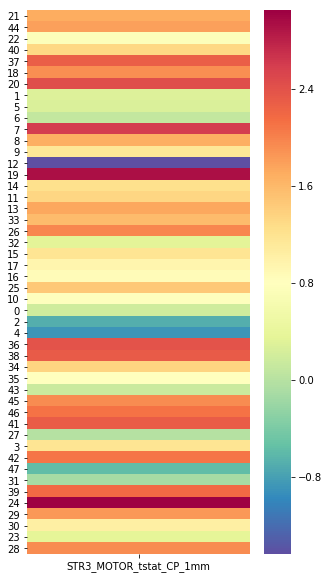

In [50]:
chi_reord = pd.DataFrame(chi_str3m).reset_index().drop(['index'],axis=1)

chi_reord = chi_reord.reindex(index = cg.dendrogram_row.reordered_ind)

fig = plt.figure(figsize=(5, 10))
sns.heatmap(chi_reord, cmap = 'Spectral_r', cbar=True)
#plt.savefig(os.path.join(save_fig_dir,'latent_structure_CHI.png'), bbox_inches='tight', transparent = 1, dpi = 500)

In [44]:
pd.DataFrame(chi_str3m).reset_index()

,index,STR3_MOTOR_tstat_CP_1mm
0,126432517,0.177072
1,126432120,0.287642
2,127687979,-0.696988
3,127687931,1.187267
4,127687915,-0.882475
5,127687867,0.265349
6,126432136,0.090568
7,126439301,2.599940
8,139379739,1.683687
9,1028,1.146401


In [41]:
chi_str3m

,STR3_MOTOR_tstat_CP_1mm
126432517,0.177072
126432120,0.287642
127687979,-0.696988
127687931,1.187267
127687915,-0.882475
127687867,0.265349
126432136,0.090568
126439301,2.599940
139379739,1.683687
1028,1.146401
